# ConvNet: Cat vs Dog dataset

In [91]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras import layers, models, optimizers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

plt.style.use('ggplot')

## Build model

In [11]:
def build_model(conv_l=[32, 64, 128, 128], kernel=[3, 3, 3, 3], dense_l=[512]):
    model = models.Sequential()
    for i in range(len(conv_l)):
        if i == 0:
            model.add(layers.Conv2D(conv_l[i], (kernel[i], kernel[i]),
                                    activation='relu', input_shape=(150, 150, 3)))
            model.add(layers.MaxPooling2D((2, 2)))
            continue
        
        model.add(layers.Conv2D(conv_l[i], (kernel[i], kernel[i]), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))
        
    model.add(layers.Flatten())
    
    for j in range(len(dense_l)):
        model.add(layers.Dense(dense_l[j], activation='relu'))
    
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

In [14]:
model1 = build_model()

In [15]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [86]:
model1.compile(optimizer=optimizers.RMSprop(lr=1e-4),
               loss="binary_crossentropy",
               metrics=["acc"])

## Get the data and split it to Train, Test and Validation

In [26]:
import os, shutil, glob

In [23]:
!ls datasets/cats_and_dogs2000

train  validation  vectorize.py


In [33]:
# Create test set
test_path = "datasets/cats_and_dogs2000/test"
test_cat_path = "datasets/cats_and_dogs2000/test/cats"
test_dog_path = "datasets/cats_and_dogs2000/test/dogs"

if not os.path.exists(test_path):
    os.mkdir(test_path)
    os.mkdir(test_cat_path)
    os.mkdir(test_dog_path)
else:
    print(f"'{test_path}' already exists")

'datasets/cats_and_dogs2000/test' already exists


In [62]:
TEST_MOVE = True

In [63]:
# From 1000 cat and 1000 dog images, copy 300 to test set
NUM_TEST = 300

train_path = "datasets/cats_and_dogs2000/train"
cat_path = os.path.join(train_path, "cats")
dog_path = os.path.join(train_path, "dogs")

cat_images = [i for i in glob.glob(os.path.join(cat_path, "*.jpg"))]
dog_images = [i for i in glob.glob(os.path.join(dog_path, "*.jpg"))]

np.random.shuffle(cat_images)
np.random.shuffle(dog_images)

if TEST_MOVE:
    for cat, dog in zip(cat_images[:NUM_TEST], dog_images[:NUM_TEST]):
        img_cat = os.path.join(test_cat_path, os.path.basename(cat))
        img_dog = os.path.join(test_dog_path, os.path.basename(dog))
        shutil.move(cat, img_cat)
        shutil.move(dog, img_dog)

In [64]:
VAL_MOVE = True

In [65]:
# From 1000 cat and 1000 dog images, copy 300 to test set
NUM_VAL = 100

val_path = "datasets/cats_and_dogs2000/validation"
cat_val_path = os.path.join(val_path, "cats")
dog_val_path = os.path.join(val_path, "dogs")

cat_images = [i for i in glob.glob(os.path.join(cat_val_path, "*.jpg"))]
dog_images = [i for i in glob.glob(os.path.join(dog_val_path, "*.jpg"))]

np.random.shuffle(cat_images)
np.random.shuffle(dog_images)

if VAL_MOVE:
    for cat, dog in zip(cat_images[:NUM_VAL], dog_images[:NUM_VAL]):
        img_cat = os.path.join(test_cat_path, os.path.basename(cat))
        img_dog = os.path.join(test_dog_path, os.path.basename(dog))
        shutil.move(cat, img_cat)
        shutil.move(dog, img_dog)

In [66]:
train_path = "datasets/cats_and_dogs2000/train"
test_path = "datasets/cats_and_dogs2000/test"
val_path = "datasets/cats_and_dogs2000/validation"

train_cats_dir = os.path.join(train_path, "cats")
train_dogs_dir = os.path.join(train_path, "dogs")

test_cats_dir = os.path.join(test_path, "cats")
test_dogs_dir = os.path.join(test_path, "dogs")

val_cats_dir = os.path.join(val_path, "cats")
val_dogs_dir = os.path.join(val_path, "dogs")

In [77]:
train_len_cats = len(os.listdir(train_cats_dir))
train_len_dogs = len(os.listdir(train_dogs_dir))
test_len_cats = len(os.listdir(test_cats_dir))
test_len_dogs = len(os.listdir(test_dogs_dir))
val_len_cats = len(os.listdir(val_cats_dir))
val_len_dogs = len(os.listdir(val_dogs_dir))
print(f"Train cat image length: {train_len_cats}")
print(f"Train dog image length: {train_len_dogs}")
print(f"Test cat image length: {test_len_cats}")
print(f"Test dog image length: {test_len_dogs}")
print(f"Validation cat image length: {val_len_cats}")
print(f"Validation dog image length: {val_len_dogs}")

Train cat image length: 700
Train dog image length: 700
Test cat image length: 400
Test dog image length: 400
Validation cat image length: 400
Validation dog image length: 400


## Data Preprocessing

In [78]:
BATCH_TRAIN_GEN_SIZE = 20
BATCH_VAL_GEN_SIZE = 20

In [79]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=(150, 150),
                                                    batch_size=BATCH_TRAIN_GEN_SIZE,
                                                    class_mode='binary')
val_generator = val_datagen.flow_from_directory(val_path,
                                                target_size=(150, 150),
                                                batch_size=BATCH_VAL_GEN_SIZE,
                                                class_mode='binary')

Found 1400 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [80]:
for data_batch, labels_batch in train_generator:
    print("Data batch shape: ", data_batch.shape)
    print("Labels batch shape: ", labels_batch.shape)
    break

Data batch shape:  (20, 150, 150, 3)
Labels batch shape:  (20,)


In [83]:
STEPS_PER_EPOCH = (train_len_cats+train_len_dogs)/BATCH_TRAIN_GEN_SIZE
VAL_STEPS_PER_EPOCH = (val_len_cats+val_len_dogs)/BATCH_VAL_GEN_SIZE
print(STEPS_PER_EPOCH, VAL_STEPS_PER_EPOCH)

EPOCHS = 30

70.0 40.0


## Train the model

In [87]:
history = model1.fit_generator(train_generator,
                               steps_per_epoch=STEPS_PER_EPOCH,
                               epochs=EPOCHS,
                               validation_data=val_generator,
                               validation_steps=VAL_STEPS_PER_EPOCH)

W0821 13:57:11.514773 139928495044416 deprecation_wrapper.py:119] From /home/reljod/.virtualenvs/tf/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/30
70/70 [==============================] - 25s 350ms/step - loss: 0.6953 - acc: 0.5114 - val_loss: 0.6838 - val_acc: 0.6513
Epoch 2/30
70/70 [==============================] - 27s 389ms/step - loss: 0.6711 - acc: 0.6014 - val_loss: 0.6347 - val_acc: 0.6500
Epoch 3/30
70/70 [==============================] - 27s 389ms/step - loss: 0.6217 - acc: 0.6536 - val_loss: 0.6245 - val_acc: 0.6313
Epoch 4/30
70/70 [==============================] - 27s 390ms/step - loss: 0.5771 - acc: 0.7043 - val_loss: 0.6028 - val_acc: 0.6850
Epoch 5/30
70/70 [==============================] - 27s 391ms/step - loss: 0.5527 - acc: 0.7264 - val_loss: 0.5823 - val_acc: 0.6737
Epoch 6/30
70/70 [==============================] - 28s 393ms/step - loss: 0.5307 - acc: 0.7343 - val_loss: 0.5893 - val_acc: 0.6962
Epoch 7/30
70/70 [==============================] - 31s 442ms/step - loss: 0.5092 - acc: 0.7529 - val_loss: 0.5859 - val_acc: 0.7000
Epoch 8/30
70/70 [==============================] - 28s 401ms/step - 

## Save the model

In [118]:
model1.save('cats_and_dogs_small_1.h5')

## Visualize the Training and Validation metrics

In [88]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [89]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc)+1)

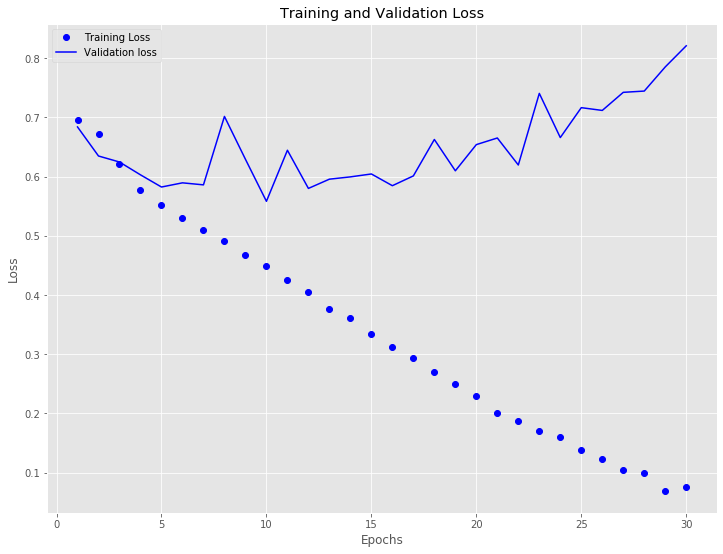

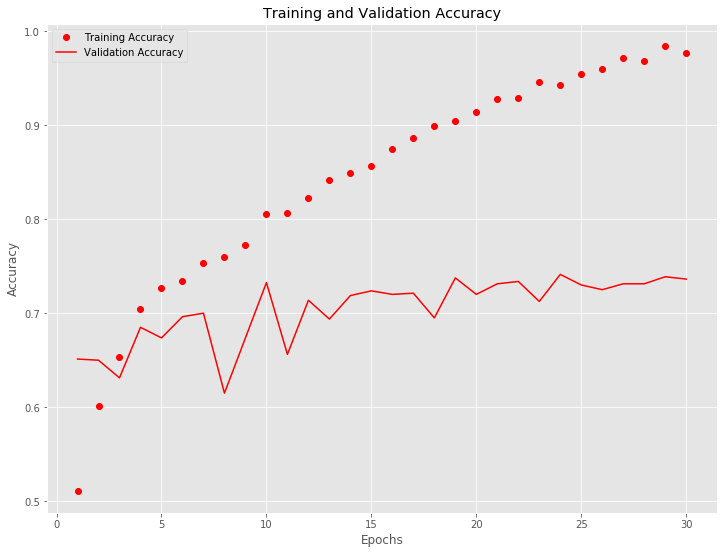

In [94]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9

plt.plot(epochs, loss, 'bo', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(epochs, acc, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc, 'r', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<br>
<br>

# Dealing with Overfitting: Data Augmentation and Dropout

* Adding more data through data augmentation is one of the best way to increase the performance of the model especially in Computer Vision.
* Adding some Dropout also makes the model mode robust in overfitting effect.

## Data Augmentation using Keras ImageDataGenerator

In [100]:
train_datagen2 = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen2 = ImageDataGenerator(rescale=1./255)

train_generator2 = train_datagen2.flow_from_directory(train_path,
                                                    target_size=(150, 150),
                                                    batch_size=BATCH_TRAIN_GEN_SIZE,
                                                    class_mode='binary')
val_generator2 = val_datagen2.flow_from_directory(val_path,
                                                target_size=(150, 150),
                                                batch_size=BATCH_VAL_GEN_SIZE,
                                                class_mode='binary')

Found 1400 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [108]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

In [109]:
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))

datasets/cats_and_dogs2000/train/cats/cat.304.jpg


## Check Augmented image

(150, 150, 3)
(1, 150, 150, 3)


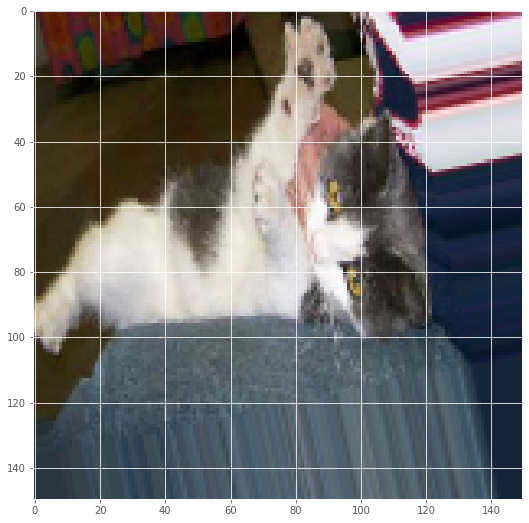

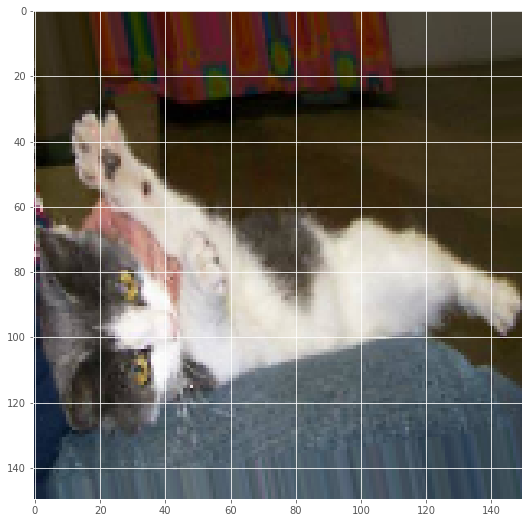

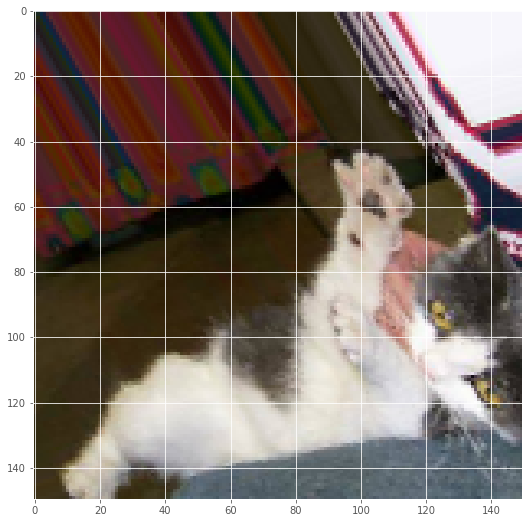

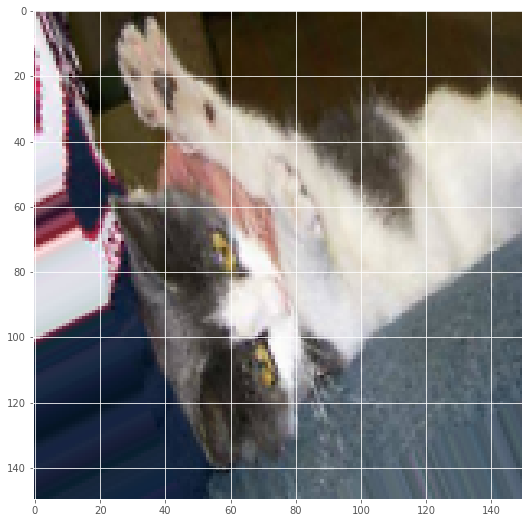

In [112]:
x = image.img_to_array(img)
print(x.shape)
x = x.reshape((1,) + x.shape)
print(x.shape)

i = 0
for batch in train_datagen2.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

## Adding Dropout to the current model

In [120]:
def build_model_with_Dropout(conv_l=[32, 64, 128, 128], kernel=[3, 3, 3, 3], dense_l=[512]):
    model = models.Sequential()
    for i in range(len(conv_l)):
        if i == 0:
            model.add(layers.Conv2D(conv_l[i], (kernel[i], kernel[i]),
                                    activation='relu', input_shape=(150, 150, 3)))
            model.add(layers.MaxPooling2D((2, 2)))
            continue
        
        model.add(layers.Conv2D(conv_l[i], (kernel[i], kernel[i]), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))
        
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5)) ### <---- Dropout
    
    for j in range(len(dense_l)):
        model.add(layers.Dense(dense_l[j], activation='relu'))
    
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
               loss="binary_crossentropy",
               metrics=["acc"])
    return model

model2 = build_model_with_Dropout()

In [121]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [122]:
train_datagen2 = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen2 = ImageDataGenerator(rescale=1./255)

train_generator2 = train_datagen2.flow_from_directory(train_path,
                                                    target_size=(150, 150),
                                                    batch_size=BATCH_TRAIN_GEN_SIZE,
                                                    class_mode='binary')
val_generator2 = val_datagen2.flow_from_directory(val_path,
                                                target_size=(150, 150),
                                                batch_size=BATCH_VAL_GEN_SIZE,
                                                class_mode='binary')

Found 1400 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [123]:
EPOCHS2 = 100

## Train the new model with Dropout using the Augmented Images

In [124]:
history2 = model2.fit_generator(train_generator2,
                               steps_per_epoch=STEPS_PER_EPOCH,
                               epochs=EPOCHS2,
                               validation_data=val_generator2,
                               validation_steps=VAL_STEPS_PER_EPOCH)

Epoch 1/100
70/70 [==============================] - 27s 388ms/step - loss: 0.6957 - acc: 0.5071 - val_loss: 0.6943 - val_acc: 0.5012
Epoch 2/100
70/70 [==============================] - 28s 406ms/step - loss: 0.6913 - acc: 0.5421 - val_loss: 0.6868 - val_acc: 0.5025
Epoch 3/100
70/70 [==============================] - 29s 408ms/step - loss: 0.6866 - acc: 0.5307 - val_loss: 0.6686 - val_acc: 0.6187
Epoch 4/100
70/70 [==============================] - 29s 408ms/step - loss: 0.6821 - acc: 0.5586 - val_loss: 0.6688 - val_acc: 0.5525
Epoch 5/100
70/70 [==============================] - 29s 410ms/step - loss: 0.6749 - acc: 0.5757 - val_loss: 0.6897 - val_acc: 0.5262
Epoch 6/100
70/70 [==============================] - 29s 409ms/step - loss: 0.6596 - acc: 0.5914 - val_loss: 0.6780 - val_acc: 0.5550
Epoch 7/100
70/70 [==============================] - 29s 410ms/step - loss: 0.6589 - acc: 0.6086 - val_loss: 0.6187 - val_acc: 0.6575
Epoch 8/100
70/70 [==============================] - 29s 411ms

Epoch 62/100
70/70 [==============================] - 29s 412ms/step - loss: 0.4613 - acc: 0.7829 - val_loss: 0.4731 - val_acc: 0.7725
Epoch 63/100
70/70 [==============================] - 29s 413ms/step - loss: 0.4553 - acc: 0.7886 - val_loss: 0.4664 - val_acc: 0.7688
Epoch 64/100
70/70 [==============================] - 29s 410ms/step - loss: 0.4492 - acc: 0.7886 - val_loss: 0.4648 - val_acc: 0.7612
Epoch 65/100
70/70 [==============================] - 29s 409ms/step - loss: 0.4598 - acc: 0.7814 - val_loss: 0.4548 - val_acc: 0.7900
Epoch 66/100
70/70 [==============================] - 29s 409ms/step - loss: 0.4607 - acc: 0.7829 - val_loss: 0.4679 - val_acc: 0.7737
Epoch 67/100
70/70 [==============================] - 31s 448ms/step - loss: 0.4516 - acc: 0.7907 - val_loss: 0.4652 - val_acc: 0.7725
Epoch 68/100
70/70 [==============================] - 29s 412ms/step - loss: 0.4607 - acc: 0.7943 - val_loss: 0.4922 - val_acc: 0.7638
Epoch 69/100
70/70 [==============================] - 2

## Save the new model

In [125]:
model2.save('cats_and_dogs_small_2.h5')

## Visualize the Training and Validation Metrics

In [127]:
acc2 = history2.history["acc"]
val_acc2 = history2.history["val_acc"]
loss2 = history2.history["loss"]
val_loss2 = history2.history["val_loss"]

epochs2 = range(1, len(acc2)+1)

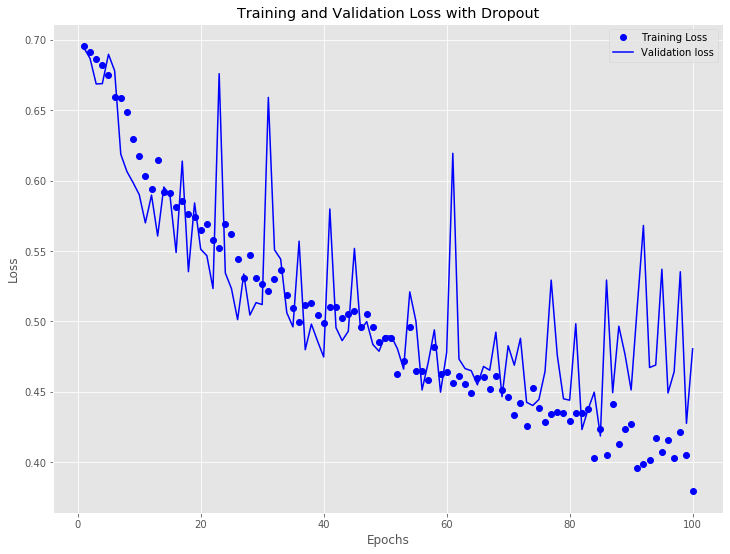

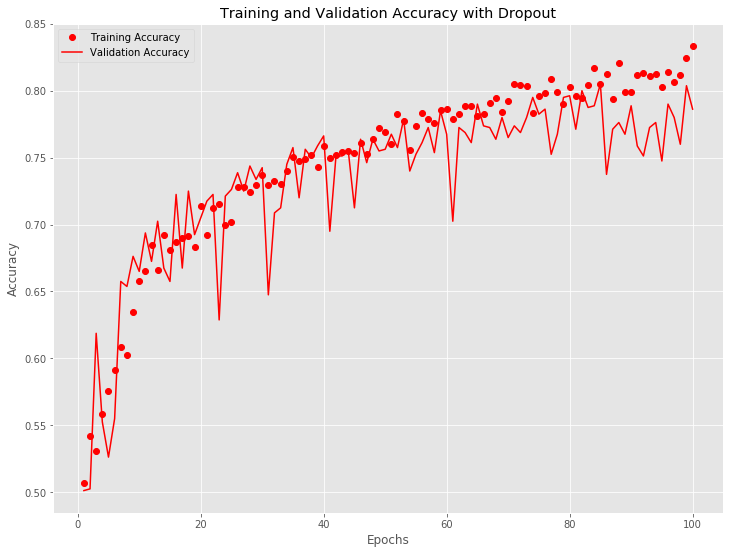

In [128]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9

plt.plot(epochs2, loss2, 'bo', label="Training Loss")
plt.plot(epochs2, val_loss2, 'b', label="Validation loss")
plt.title("Training and Validation Loss with Dropout")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(epochs2, acc2, 'ro', label="Training Accuracy")
plt.plot(epochs2, val_acc2, 'r', label="Validation Accuracy")
plt.title("Training and Validation Accuracy with Dropout")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The **new evaluation** with the help of *data augmentation* and *dropout* increases the accuracy by approximately 10% while decreases the loss to about 25% (from 0.6 to 0.45).

This proves that data augmentation really helps in the overall performance of the model while also increases the generalization power of it.


#### But how to further improve our model? Let's use Pre-trained model

# Using a Pretrained Convnet

In [130]:
from keras.applications import VGG16

In [133]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 980s 17us/step


In [134]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

  
  <br>
  <br>
  
  ## We can do two things:
  #### 1. Record the output of conv_base to a numpy array once and make it our input to our Dense layer
  #### or
  #### 2. Add Dense Layer and train  the conv_base

# Fast Feature Extraction Without Data Augmentation

In [135]:
# relative path
train_path = "datasets/cats_and_dogs2000/train"
test_path = "datasets/cats_and_dogs2000/test"
val_path = "datasets/cats_and_dogs2000/validation"

In [136]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [139]:
def extract_features(directory, sample_count):
    features = np.zeros((sample_count, 4, 4, 512))
    labels = np.zeros((sample_count))
    generator = datagen.flow_from_directory(directory,
                                            target_size=(150, 150),
                                            batch_size=batch_size,
                                            class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [140]:
train_features, train_labels = extract_features(train_path, 1400)

Found 1400 images belonging to 2 classes.


In [141]:
validation_features, validation_labels = extract_features(val_path, 800)

Found 800 images belonging to 2 classes.


In [142]:
test_features, test_labels = extract_features(test_path, 800)

Found 800 images belonging to 2 classes.


## Flatten to be an input to a Densely-connected Layer/ Fully-connected Layer

In [146]:
train_features_flatten = train_features.reshape(1400, 4 * 4 * 512)
validation_features_flatten = validation_features.reshape(800, 4 * 4 * 512)
test_features_flatten = test_features.reshape(800, 4 * 4 * 512)

In [149]:
dense = models.Sequential()
dense.add(layers.Dense(256, activation='relu', input_shape=(4 * 4 * 512,)))
dense.add(layers.Dropout(0.5))
dense.add(layers.Dense(1, activation='sigmoid'))

dense.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

In [150]:
dense.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 257       
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________


In [151]:
history3 = dense.fit(train_features_flatten, train_labels,
                     epochs = 30, batch_size = 20,
                     validation_data=(validation_features_flatten, validation_labels))

Train on 1400 samples, validate on 800 samples
Epoch 1/30
1400/1400 [==============================] - 2s 2ms/step - loss: 0.6307 - acc: 0.6414 - val_loss: 0.4842 - val_acc: 0.8037
Epoch 2/30
1400/1400 [==============================] - 2s 1ms/step - loss: 0.4711 - acc: 0.7757 - val_loss: 0.4120 - val_acc: 0.8300
Epoch 3/30
1400/1400 [==============================] - 2s 1ms/step - loss: 0.4030 - acc: 0.8150 - val_loss: 0.3651 - val_acc: 0.8512
Epoch 4/30
1400/1400 [==============================] - 2s 1ms/step - loss: 0.3604 - acc: 0.8543 - val_loss: 0.3424 - val_acc: 0.8487
Epoch 5/30
1400/1400 [==============================] - 2s 1ms/step - loss: 0.3248 - acc: 0.8636 - val_loss: 0.3213 - val_acc: 0.8587
Epoch 6/30
1400/1400 [==============================] - 2s 1ms/step - loss: 0.3032 - acc: 0.8750 - val_loss: 0.3140 - val_acc: 0.8700
Epoch 7/30
1400/1400 [==============================] - 2s 1ms/step - loss: 0.2818 - acc: 0.8907 - val_loss: 0.3050 - val_acc: 0.8650
Epoch 8/30
1400

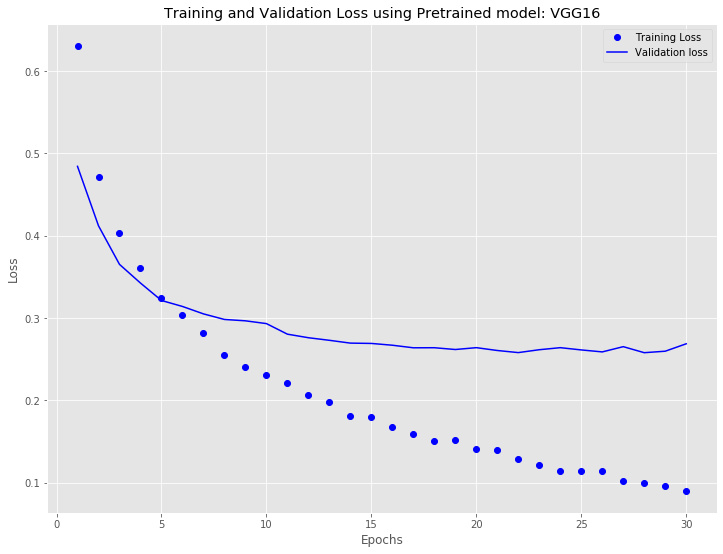

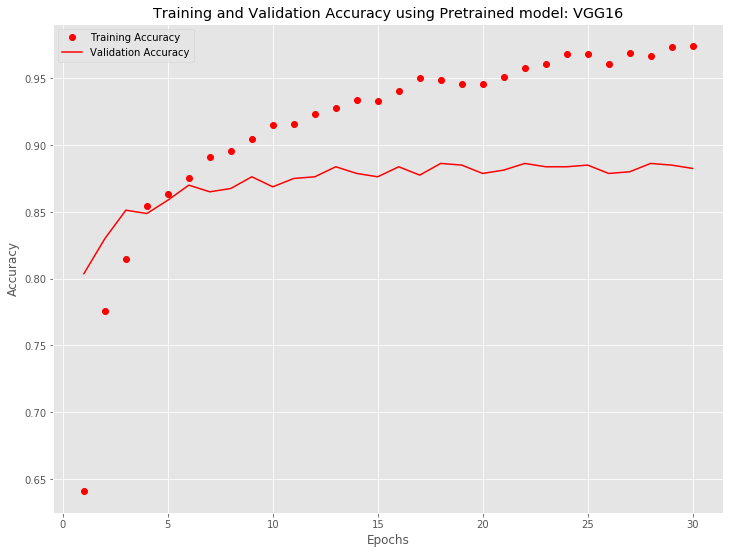

In [153]:
acc3 = history3.history["acc"]
val_acc3 = history3.history["val_acc"]
loss3 = history3.history["loss"]
val_loss3 = history3.history["val_loss"]

epochs3 = range(1, len(acc3)+1)


fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9

plt.plot(epochs3, loss3, 'bo', label="Training Loss")
plt.plot(epochs3, val_loss3, 'b', label="Validation loss")
plt.title("Training and Validation Loss using Pretrained model: VGG16")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(epochs3, acc3, 'ro', label="Training Accuracy")
plt.plot(epochs3, val_acc3, 'r', label="Validation Accuracy")
plt.title("Training and Validation Accuracy using Pretrained model: VGG16")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Result
**Wow!** Both the accuracy and loss improves with the use of Pre-trained Model! The model we did earlier only gets max 80% validation accuracy before overfitting and loss of 0.45, while this one that uses **VGG-16** as base classifier or *feature extractor* reaches max **85% validation accuracy and a loss of 0.3**.

# Feature Extraction with Data Augmentation
#### This technique is so expensive that you should only attemp it if you have access to GPU

In [186]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [187]:
# We need to add this conv_base
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [185]:
conv_base.weights

[<tf.Variable 'block1_conv1_1/kernel:0' shape=(3, 3, 3, 64) dtype=float32_ref>,
 <tf.Variable 'block1_conv1_1/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'block1_conv2_1/kernel:0' shape=(3, 3, 64, 64) dtype=float32_ref>,
 <tf.Variable 'block1_conv2_1/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'block2_conv1_1/kernel:0' shape=(3, 3, 64, 128) dtype=float32_ref>,
 <tf.Variable 'block2_conv1_1/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'block2_conv2_1/kernel:0' shape=(3, 3, 128, 128) dtype=float32_ref>,
 <tf.Variable 'block2_conv2_1/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'block3_conv1_1/kernel:0' shape=(3, 3, 128, 256) dtype=float32_ref>,
 <tf.Variable 'block3_conv1_1/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'block3_conv2_1/kernel:0' shape=(3, 3, 256, 256) dtype=float32_ref>,
 <tf.Variable 'block3_conv2_1/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'block3_conv3_1/kernel:0' shape=(3, 3, 256, 256) dtype=float32_ref>,
 

In [171]:
comb_model = models.Sequential()
comb_model.add(conv_base)
comb_model.add(layers.Flatten())
comb_model.add(layers.Dense(256, activation='relu'))
comb_model.add(layers.Dense(1, activation='softmax'))

In [172]:
comb_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_13 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


## Freeze the model

In [173]:
# Check the trainable params:
print("This is the number of trainable weights before freezing the conv base: ",
      len(comb_model.trainable_weights))

This is the number of trainable weights before freezing the conv base:  30


In [174]:
conv_base.trainable = False

In [175]:
# Check the trainable params:
print("This is the number of trainable weights after freezing the conv base: ",
      len(comb_model.trainable_weights))

This is the number of trainable weights after freezing the conv base:  4


In [160]:
STEPS_PER_EPOCH = (train_len_cats+train_len_dogs)/BATCH_TRAIN_GEN_SIZE
VAL_STEPS_PER_EPOCH = (val_len_cats+val_len_dogs)/BATCH_VAL_GEN_SIZE
print(STEPS_PER_EPOCH, VAL_STEPS_PER_EPOCH)

EPOCHS = 30

70.0 40.0


In [161]:
train_datagen4= ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen4 = ImageDataGenerator(rescale=1./255)

train_generator4 = train_datagen4.flow_from_directory(train_path,
                                                    target_size=(150, 150),
                                                    batch_size=BATCH_TRAIN_GEN_SIZE,
                                                    class_mode='binary')
val_generator4 = val_datagen4.flow_from_directory(val_path,
                                                target_size=(150, 150),
                                                batch_size=BATCH_VAL_GEN_SIZE,
                                                class_mode='binary')

Found 1400 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [178]:
comb_model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
                 loss="binary_crossentropy",
                 metrics=["acc"])

In [179]:
comb_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_13 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [188]:
## We wont be able to Train because of the limited GPU.

# history4 = comb_model.fit_generator(train_generator4,
#                               steps_per_epoch=STEPS_PER_EPOCH,
#                               epochs=30,
#                               validation_data=val_generator4,
#                               validation_steps=VAL_STEPS_PER_EPOCH)